# Student Marks Prediction

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df  = pd.read_csv('student_marks.csv')

In [3]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [4]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [ ]:
df.info()

In [ ]:
df.describe()

Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

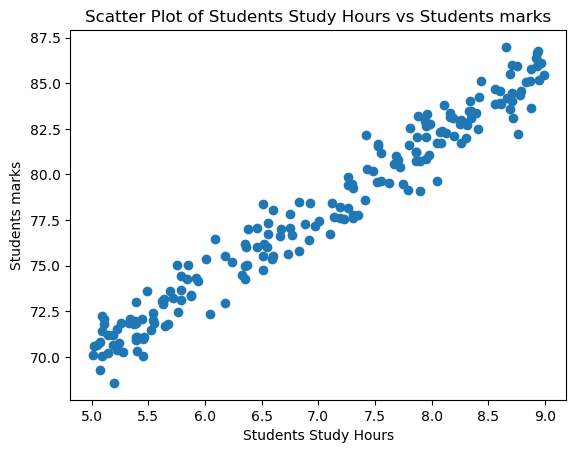

In [5]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms 

In [ ]:
# Data Cleaning

In [6]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [7]:
df.study_hours.mean()

6.9959487179487185

In [8]:
df2 = df.fillna(df.study_hours.mean())

In [9]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
# split dataset

In [10]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [12]:
X_train

,study_hours
31,6.995949
181,5.550000
82,6.660000
188,6.995949
170,5.190000
...,...
115,5.790000
117,8.830000
107,5.720000
49,5.090000


In [13]:
y_train

31     76.14
181    71.83
82     76.63
188    77.27
170    71.18
       ...  
115    74.44
117    85.04
107    73.25
49     71.41
80     84.00
Name: student_marks, Length: 160, dtype: float64

In [14]:
X_test

,study_hours
9,6.75
17,8.44
7,8.99
5,7.55
42,5.46
19,7.67
95,6.09
78,5.09
62,6.35
174,5.39


In [15]:
y_test

9      77.82
17     85.11
7      85.46
5      81.18
42     71.10
19     80.58
95     76.48
78     70.05
62     76.19
174    73.02
128    77.01
34     83.08
22     70.67
98     83.64
0      78.50
29     80.17
197    86.75
55     85.48
157    75.52
64     85.78
184    71.50
20     82.18
120    76.20
92     72.08
24     70.96
12     79.50
16     76.04
123    79.53
101    82.03
68     69.27
48     72.38
136    83.15
26     74.75
141    80.31
127    77.65
160    80.81
167    70.79
21     83.36
8      70.66
134    78.39
Name: student_marks, dtype: float64

# Select a model and train it

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
lr.coef_

array([3.89804485])

In [18]:
lr.intercept_

50.584087316941506

In [20]:
m = 3.89804485
c = 50.584087316941506
z  = m * 40 + c 
z

206.5058813169415

In [19]:
lr.predict([[40]])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([206.50588113])

In [21]:
y_pred  = lr.predict(X_test)
y_pred

array([76.89589002, 83.48358581, 85.62751048, 80.0143259 , 71.86741217,
       80.48209128, 74.32318042, 70.42513558, 75.33667208, 71.59454903,
       75.45361343, 84.57503837, 70.26921379, 85.19872554, 77.20773361,
       79.74146276, 85.43260823, 84.45809702, 74.67400446, 85.19872554,
       70.93188141, 79.50758007, 75.99933971, 71.78945127, 71.82843172,
       80.79393487, 75.37565253, 80.28718904, 81.57354384, 70.34717468,
       72.17925576, 82.39213325, 75.96035926, 79.54656052, 78.41612751,
       80.59903263, 70.34717468, 82.39213325, 70.81494006, 75.96035926])

In [22]:
temp = np.c_[X_test, y_test, y_pred]
temp

array([[ 6.75      , 77.82      , 76.89589002],
       [ 8.44      , 85.11      , 83.48358581],
       [ 8.99      , 85.46      , 85.62751048],
       [ 7.55      , 81.18      , 80.0143259 ],
       [ 5.46      , 71.1       , 71.86741217],
       [ 7.67      , 80.58      , 80.48209128],
       [ 6.09      , 76.48      , 74.32318042],
       [ 5.09      , 70.05      , 70.42513558],
       [ 6.35      , 76.19      , 75.33667208],
       [ 5.39      , 73.02      , 71.59454903],
       [ 6.38      , 77.01      , 75.45361343],
       [ 8.72      , 83.08      , 84.57503837],
       [ 5.05      , 70.67      , 70.26921379],
       [ 8.88      , 83.64      , 85.19872554],
       [ 6.83      , 78.5       , 77.20773361],
       [ 7.48      , 80.17      , 79.74146276],
       [ 8.94      , 86.75      , 85.43260823],
       [ 8.69      , 85.48      , 84.45809702],
       [ 6.18      , 75.52      , 74.67400446],
       [ 8.88      , 85.78      , 85.19872554],
       [ 5.22      , 71.5       , 70.931

In [23]:
pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,6.75,77.82,76.895890
1,8.44,85.11,83.483586
2,8.99,85.46,85.627510
3,7.55,81.18,80.014326
4,5.46,71.10,71.867412
5,7.67,80.58,80.482091
6,6.09,76.48,74.323180
7,5.09,70.05,70.425136
8,6.35,76.19,75.336672
9,5.39,73.02,71.594549


## Fine-tune your model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

In [ ]:
r2_score(y_test,y_pred)

In [24]:
lr.score(X_test,y_test)

0.9533851041822076

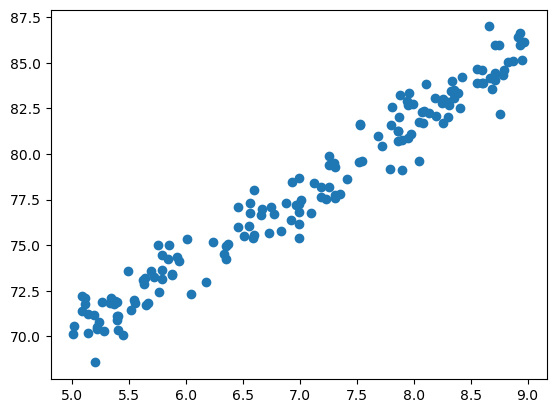

In [25]:
plt.scatter(X_train,y_train)  

In [ ]:
lr.predict(X_train)

In [ ]:
plt.scatter(X_train, lr.predict(X_train))

In [ ]:
plt.plot(X_train, lr.predict(X_train), 'r-')

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

In [ ]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")